# Pandas Tutorial

In this tutorial, we wil review some basic Pandas capabilities in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Read in the data

The pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function will load your csv file into a dataframe. 

In [2]:
df = pd.read_csv('./data/test_data.csv')

## Show the first few lines

Use the pandas [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function to display the first rows of a dataframe. You can also specify the number of rows to show, e.g., head(10) for the first 10 rows.

In [3]:
df.head(7)

,x,sin(x)
0,0.00,0.000000
1,0.01,0.010000
2,0.02,0.019999
3,0.03,0.029996
4,0.04,0.039989
5,0.05,0.049979
6,0.06,0.059964


## Select a column

To select a single column of data, put the name of that column in brackets, as shown below for the column name 'x'.

In [4]:
df['x']

0      0.00
1      0.01
2      0.02
3      0.03
4      0.04
       ... 
995    9.95
996    9.96
997    9.97
998    9.98
999    9.99
Name: x, Length: 1000, dtype: float64

Try this for the sin(x) column.

In [5]:
df['sin(x)']

0      0.000000
1      0.010000
2      0.019999
3      0.029996
4      0.039989
         ...   
995   -0.501405
996   -0.510032
997   -0.518608
998   -0.527132
999   -0.535603
Name: sin(x), Length: 1000, dtype: float64

## Find the max and min values

To find the maximum value of a column, use the [max](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) function.

In [6]:
df['x'].max()

9.99

To find the minimum value of a column, use the [min](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html) function.

In [7]:
df['x'].min()

0.0

Try this for the sin(x) column, too.

In [8]:
df['sin(x)'].max()

0.999999683

In [9]:
df['sin(x)'].min()

-0.999997146

## Create a new column

To create a new column, use the instructions [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html). For example, we can create a new cos(x) column, as shown below.

In [10]:
df['cos(x)'] = np.cos(df['x'])

Show the first few rows again to make sure your new column is there.

In [11]:
df.head()

,x,sin(x),cos(x)
0,0.00,0.000000,1.00000
1,0.01,0.010000,0.99995
2,0.02,0.019999,0.99980
3,0.03,0.029996,0.99955
4,0.04,0.039989,0.99920


## Write a function definition

Now, let's try a function definition. We'll create a function that returns 1 - sin(x).

In [12]:
def one_minus_sin_x(sin_x):
    return 1. - sin_x

## Indexing

Let's say we want to know the value of 1-sin(x) at the row index 10. We first want to find the value of sin(x) at row index 10, we do this by using [iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [13]:
df['sin(x)'].iloc[10]

0.099833417

Just to double-check our work, use the head function to show the first 15 rows and make sure you got the correct sin(x) value for row index 10.

In [14]:
df.head(15)

,x,sin(x),cos(x)
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999200
5,0.05,0.049979,0.998750
6,0.06,0.059964,0.998201
7,0.07,0.069943,0.997551
8,0.08,0.079915,0.996802
9,0.09,0.089879,0.995953


## Use our function to calculate 1-sin(x)

Now, let's use our function definition to find 1-sin(x) for row index 10.

In [15]:
one_minus_sin_x(df['sin(x)'].iloc[10])

0.900166583

We can also apply this function to the entire sin(x) column and define a new column called '1-sin(x)' in our dataframe.

In [16]:
df['1-sin(x)'] = one_minus_sin_x(df['sin(x)'])

Use head again to see our new column.

In [17]:
df.head()

,x,sin(x),cos(x),1-sin(x)
0,0.00,0.000000,1.00000,1.000000
1,0.01,0.010000,0.99995,0.990000
2,0.02,0.019999,0.99980,0.980001
3,0.03,0.029996,0.99955,0.970005
4,0.04,0.039989,0.99920,0.960011


## Plotting

There are two ways to plot a pandas dataframe. One is to use the pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function.

<AxesSubplot:xlabel='x'>

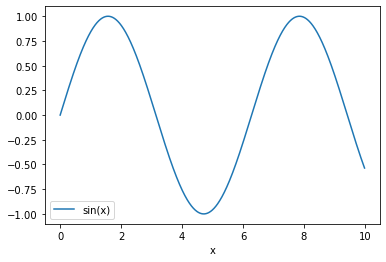

In [18]:
df.plot('x', 'sin(x)')

The other is to use the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function in matplotlib pyplot. You can even add a title and axis labels!

**Let's try this for x vs. sin(x), x vs. cos(x), and x vs. 1-sin(x)**

Text(0, 0.5, 'sin(x)')

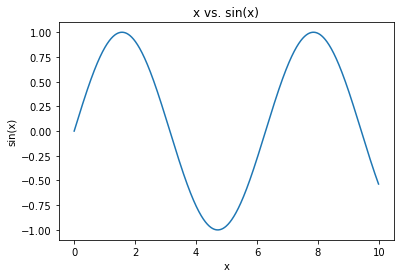

In [19]:
plt.plot(df['x'], df['sin(x)'])
plt.title('x vs. sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')

For cos(x), I'll try a new color.

Text(0, 0.5, 'cos(x)')

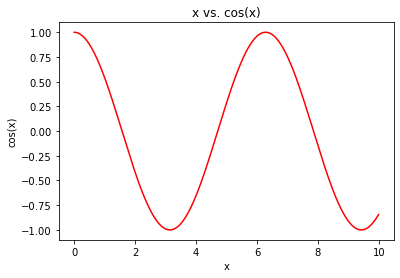

In [20]:
plt.plot(df['x'], df['cos(x)'], color='red')
plt.title('x vs. cos(x)')
plt.xlabel('x')
plt.ylabel('cos(x)')

We can also use the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function to plot points instead of a line.

Text(0, 0.5, '1-sin(x)')

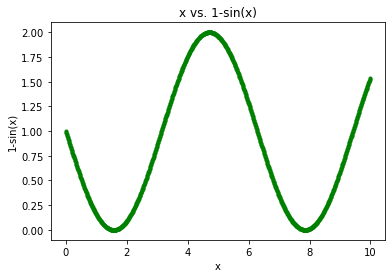

In [21]:
plt.scatter(df['x'], df['1-sin(x)'], marker='.', color='green')
plt.title('x vs. 1-sin(x)')
plt.xlabel('x')
plt.ylabel('1-sin(x)')

And we can change the x limits to show the individual points.

(0.0, 0.5)

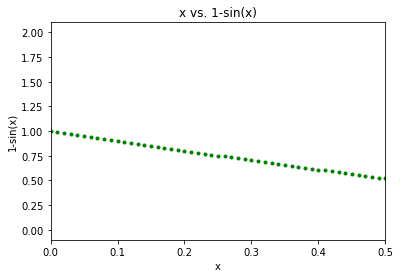

In [22]:
plt.scatter(df['x'], df['1-sin(x)'], marker='.', color='green')
plt.title('x vs. 1-sin(x)')
plt.xlabel('x')
plt.ylabel('1-sin(x)')
plt.xlim(0,0.5)